In [1]:
from sklearn.datasets import load_iris

In [2]:
X,y=load_iris(return_X_y=True)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [4]:
grid_model=GridSearchCV(model,param_grid={"n_neighbors":range(2,51),
                               "weights":["distance","uniform"],
                              "metric":["euclidean","manhattan","minkowski"]},
                       cv=5,)

In [5]:
grid_model.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(2, 51),
                         'weights': ['distance', 'uniform']})

In [6]:
grid_model.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

In [7]:
grid_model.best_score_

0.9866666666666667

In [8]:
grid_model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
best_model = KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

In [10]:
best_model.fit(X,y)

KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

In [11]:
import json

In [12]:
json?

Type:        module
String form: <module 'json' from '/Users/georgebsmith/opt/anaconda3/lib/python3.9/json/__init__.py'>
File:        ~/opt/anaconda3/lib/python3.9/json/__init__.py
Docstring:  
JSON (JavaScript Object Notation) <http://json.org> is a subset of
JavaScript syntax (ECMA-262 3rd edition) used as a lightweight data
interchange format.

:mod:`json` exposes an API familiar to users of the standard library
:mod:`marshal` and :mod:`pickle` modules.  It is derived from a
version of the externally maintained simplejson library.

Encoding basic Python object hierarchies::

    >>> import json
    >>> json.dumps(['foo', {'bar': ('baz', None, 1.0, 2)}])
    '["foo", {"bar": ["baz", null, 1.0, 2]}]'
    >>> print(json.dumps("\"foo\bar"))
    "\"foo\bar"
    >>> print(json.dumps('\u1234'))
    "\u1234"
    >>> print(json.dumps('\\'))
    "\\"
    >>> print(json.dumps({"c": 0, "b": 0, "a": 0}, sort_keys=True))
    {"a": 0, "b": 0, "c": 0}
    >>> from io import StringIO
    >>> io = St

In [13]:
d={"name":"Smith",'sex':"Male","isMarried":True}

In [14]:
d

{'name': 'Smith', 'sex': 'Male', 'isMarried': True}

In [15]:
json.dumps(d)

'{"name": "Smith", "sex": "Male", "isMarried": true}'

In [16]:
import pandas as pd

In [18]:
df=pd.read_csv("../titanic/train.csv")

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
df.Survived.value_counts()/df.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
# unbalanced data set

In [23]:
160/200

0.8

In [24]:
150/190

0.7894736842105263

In [25]:
90/125

0.72

In [26]:
90/95

0.9473684210526315

In [29]:
y_pred=grid_model.predict(X)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
cm=confusion_matrix(y,y_pred)

In [32]:
import matplotlib.pyplot as plt

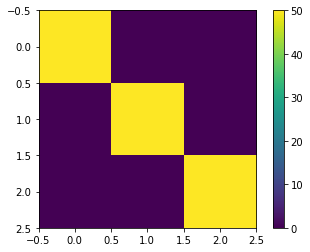

In [35]:
plt.imshow(cm)
plt.colorbar()

In [38]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [41]:
import numpy as np

In [45]:
y=np.random.randint(0,2,80)

In [46]:
y_pred1=np.random.randint(0,2,80)

In [47]:
y

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [48]:
y_pred1

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [50]:
cm1=confusion_matrix(y,y_pred1)

In [51]:
print(classification_report(y,y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        46
           1       0.30      0.26      0.28        34

    accuracy                           0.42        80
   macro avg       0.40      0.40      0.40        80
weighted avg       0.42      0.42      0.42        80



In [52]:
cm1

array([[25, 21],
       [25,  9]])

In [54]:
9/(9+21)

0.3